## Classic ESN (NO IP)

In [51]:
from IPReservoir import IPReservoir
from ESN import Reservoir, EchoStateNetwork
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [52]:
network = EchoStateNetwork(Reservoir(1, 1000, ro_rescale=0.85, sparsity=0.7))

In [53]:
network.train(X_TR, Y_TR, 0.1, transient=100)

torch.Size([7900])


[1.2890624561837263, 0.005165423203697126, 0.12275768832448634]


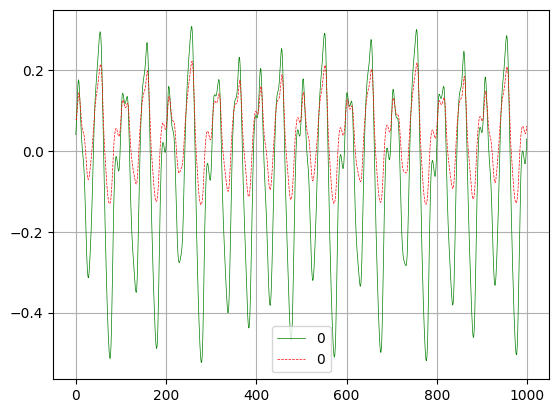

In [54]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [5]:
network.MC(X_TR, 200)

1.2658755683092648

## ESN IP - Normal Distribution

In [35]:
from IPReservoir import IPReservoir
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [41]:
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,1000, sparsity=0.8, ro_rescale=0.2)

ip_mask = IPMask.normalMask(1000)

ip_reservoir.set_IP_mask(ip_mask)

In [44]:
ip_reservoir.pre_train(X_TR, -0.000025, epochs=5, transient=100, learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 1742.1444091796875.
- Epoch: 2) | KL Divergence value: 1740.3203125.
- Epoch: 3) | KL Divergence value: 1738.494140625.
- Epoch: 4) | KL Divergence value: 1736.6661376953125.
- Epoch: 5) | KL Divergence value: 1734.8360595703125.


In [46]:
ip_reservoir.predict(X_TR, False, True)

tensor([[ 1.2271e-02,  8.7577e-03, -3.0086e-02,  ...,  2.9499e-02,
         -7.5227e-02,  7.3371e-02],
        [ 7.8540e-05,  3.5023e-02, -4.3244e-02,  ...,  3.2426e-02,
         -9.1519e-02,  8.5921e-02],
        [-2.9000e-04,  5.5101e-02, -6.1804e-02,  ...,  4.2776e-02,
         -1.2925e-01,  1.2471e-01],
        ...,
        [-1.0651e-02,  3.7865e-02, -2.0533e-02,  ...,  5.4411e-03,
         -3.1751e-02,  3.6695e-02],
        [-4.0504e-03,  4.2970e-02, -3.9216e-02,  ...,  2.3804e-02,
         -7.8465e-02,  7.9769e-02],
        [ 1.1532e-03,  4.3114e-02, -4.9627e-02,  ...,  3.5290e-02,
         -1.0587e-01,  1.0445e-01]])

In [45]:
ip_reservoir.printIPstats()

Nothing to print - No activation saved in the buffer


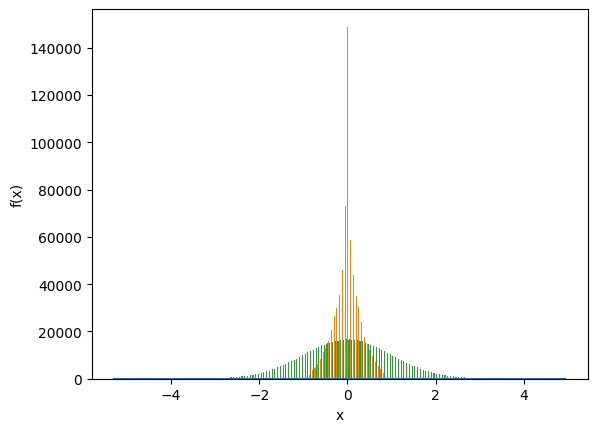

In [47]:
ip_reservoir.plot_overall_activation_distribution()

In [48]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

In [49]:
network.train(X_TR, Y_TR, 0.15, transient=100)

No transient applied. Reservoir was already warmed up
torch.Size([8000])


[0.6079282536345637, 0.0020783781488085454, 0.057440397636828615]


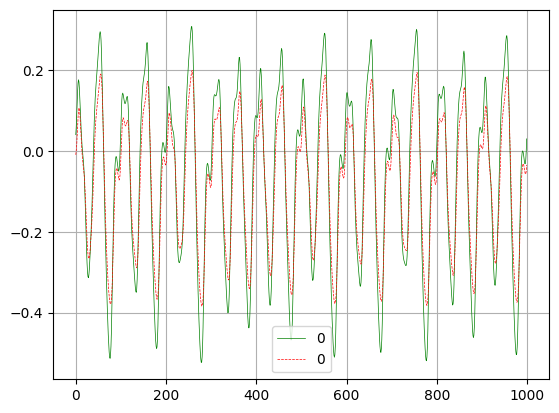

In [50]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [ ]:
network.MC(X_TR, 200)

## Non linear ESN - Full Gaussian with opposite Means

In [55]:
from IPReservoir import IPReservoir
from ESN import Reservoir, EchoStateNetwork
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [56]:
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,1000, sparsity=0.8, ro_rescale=0.2)

ip_mask = IPMask.mixedBimodalMask(1000)

ip_reservoir.set_IP_mask(ip_mask)

In [69]:
ip_reservoir.pre_train(X_TR, 0.000001, epochs=15, transient=100, learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2786.5419921875.
- Epoch: 2) | KL Divergence value: 2732.640869140625.
- Epoch: 3) | KL Divergence value: 2681.6435546875.
- Epoch: 4) | KL Divergence value: 2633.47900390625.
- Epoch: 5) | KL Divergence value: 2588.07177734375.
- Epoch: 6) | KL Divergence value: 2545.34033203125.
- Epoch: 7) | KL Divergence value: 2505.20068359375.
- Epoch: 8) | KL Divergence value: 2467.573486328125.
- Epoch: 9) | KL Divergence value: 2432.36865234375.
- Epoch: 10) | KL Divergence value: 2399.498046875.
- Epoch: 11) | KL Divergence value: 2368.8759765625.
- Epoch: 12) | KL Divergence value: 2340.41845703125.
- Epoch: 13) | KL Divergence value: 2314.0458984375.
- Epoch: 14) | KL Divergence value: 2289.6787109375.
- Epoch: 15) | KL Divergence value: 2267.239990234375.


In [84]:
ip_reservoir.predict(X_TR, False, True)

tensor([[-0.6870,  0.6479, -0.5805,  ...,  0.6765, -0.7565,  0.6941],
        [-0.6843,  0.6351, -0.5645,  ...,  0.6451, -0.7488,  0.6717],
        [-0.6756,  0.6102, -0.5391,  ...,  0.6330, -0.7691,  0.6717],
        ...,
        [-0.6937,  0.6702, -0.6020,  ...,  0.6924, -0.7396,  0.6977],
        [-0.6855,  0.6427, -0.5723,  ...,  0.6622, -0.7513,  0.6824],
        [-0.6807,  0.6254, -0.5544,  ...,  0.6406, -0.7571,  0.6716]])

In [ ]:
ip_reservoir.printIPstats()

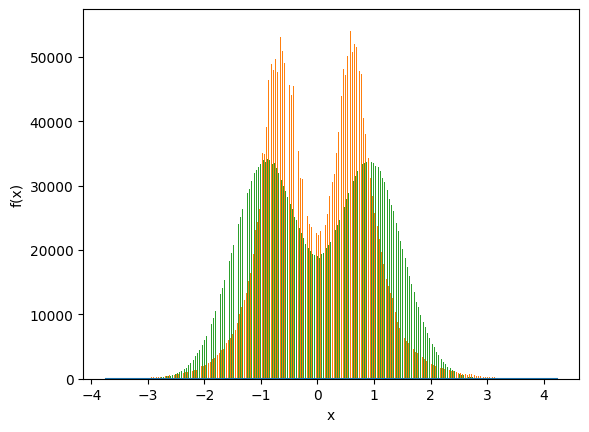

In [90]:
ip_reservoir.plot_overall_activation_distribution()

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [72]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

In [98]:
network.train(X_TR, Y_TR, 0.04, transient=100)

No transient applied. Reservoir was already warmed up
torch.Size([8000])


[0.9797597997053564, 0.007261564920382299, 0.22430638792444335]


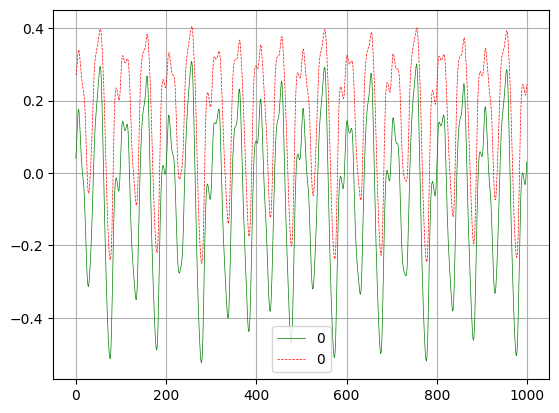

In [99]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [100]:
network.MC(X_TR, 200)

55.5269246369429